# Exploration and analysis of car sales


See below an analysis of listed used car sales. This notebook shows some steps taken to clean up and resolve data errors and then explores the relation between the manufacturer, number of miles on the car, transmission type, and price.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway


In [2]:
#
df = pd.read_csv('vehicles_us.csv')

In [3]:
#Get a column for the manufacturer
df['manufacturer']= df['model'].apply(lambda x: x.split()[0])

In [4]:
#preview the data set
#I see some missing values, I will fill them in by median, mean, and no info', depending on the column.
df.sample(20, random_state=40)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
32767,5990,2007.0,hyundai santa fe,excellent,6.0,gas,141641.0,automatic,SUV,blue,NaN,2018-05-16,9,hyundai
17887,7500,2012.0,toyota camry le,like new,4.0,gas,102000.0,automatic,sedan,black,NaN,2018-08-08,61,toyota
17450,5500,2004.0,chevrolet colorado,excellent,4.0,gas,146885.0,automatic,pickup,black,1.0,2018-05-02,8,chevrolet
13159,37000,2018.0,chevrolet silverado 1500 crew,good,8.0,gas,30465.0,other,pickup,NaN,1.0,2019-01-26,31,chevrolet
25500,27483,2018.0,jeep wrangler unlimited,good,4.0,gas,17600.0,automatic,wagon,orange,1.0,2018-11-17,45,jeep
27859,5995,2011.0,chevrolet cruze,excellent,4.0,gas,112000.0,automatic,sedan,white,NaN,2018-10-20,104,chevrolet
19681,8900,2015.0,chevrolet cruze,good,4.0,gas,48123.0,automatic,sedan,black,NaN,2018-09-04,7,chevrolet
34069,8900,2009.0,chevrolet silverado 1500,excellent,8.0,gas,165181.0,automatic,pickup,grey,1.0,2018-12-06,116,chevrolet
5483,3450,2003.0,honda accord,excellent,NaN,gas,136000.0,automatic,sedan,brown,NaN,2018-09-06,20,honda
35658,2950,NaN,chevrolet trailblazer,good,6.0,gas,157500.0,automatic,SUV,red,NaN,2018-08-17,21,chevrolet


In [5]:
#Fill the missing odometer values with the average odometer values in the rest of the column
#df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('mean'), inplace=True)


In [6]:
#fill the `is_4wd` column missing values with the value '0'

df['is_4wd'] = df['is_4wd'].fillna(0)

In [7]:
#fill the `paint_color` column missing values with the string 'no info'

df['paint_color'] = df['paint_color'].fillna('no info')

In [8]:
#For missing values in `model_year`, we will use median of each model

df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'), inplace = True)


In [9]:
#Fill the `cylinders` column with the median value of each model

df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'), inplace = True)

In [10]:
#validate the updates are as expected

df.sample(20, random_state=40)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
32767,5990,2007.0,hyundai santa fe,excellent,6.0,gas,141641.0,automatic,SUV,blue,0.0,2018-05-16,9,hyundai
17887,7500,2012.0,toyota camry le,like new,4.0,gas,102000.0,automatic,sedan,black,0.0,2018-08-08,61,toyota
17450,5500,2004.0,chevrolet colorado,excellent,4.0,gas,146885.0,automatic,pickup,black,1.0,2018-05-02,8,chevrolet
13159,37000,2018.0,chevrolet silverado 1500 crew,good,8.0,gas,30465.0,other,pickup,no info,1.0,2019-01-26,31,chevrolet
25500,27483,2018.0,jeep wrangler unlimited,good,4.0,gas,17600.0,automatic,wagon,orange,1.0,2018-11-17,45,jeep
27859,5995,2011.0,chevrolet cruze,excellent,4.0,gas,112000.0,automatic,sedan,white,0.0,2018-10-20,104,chevrolet
19681,8900,2015.0,chevrolet cruze,good,4.0,gas,48123.0,automatic,sedan,black,0.0,2018-09-04,7,chevrolet
34069,8900,2009.0,chevrolet silverado 1500,excellent,8.0,gas,165181.0,automatic,pickup,grey,1.0,2018-12-06,116,chevrolet
5483,3450,2003.0,honda accord,excellent,4.0,gas,136000.0,automatic,sedan,brown,0.0,2018-09-06,20,honda
35658,2950,2005.0,chevrolet trailblazer,good,6.0,gas,157500.0,automatic,SUV,red,0.0,2018-08-17,21,chevrolet


In [11]:
#we see that some of these columns are listed as 'objects' but we could benefit by listing them as categories and datetimes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      50975 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  manufacturer  51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


<div class='alert alert-info'>
    
Updating the following columns to 'category' data type
    -`manufacturer`
    -`cylinders`
    -`transmission`
    -`fuel`
    
 
Updating `date_posted` to be a datetime data type
    
Updating `model_year` and `is_4wd` to be an int data type
    

In [12]:
df['manufacturer'] = df['manufacturer'].astype('category')


In [13]:
df['cylinders'] = df['cylinders'].astype('category')

In [14]:
df['is_4wd'] = df['is_4wd'].astype('int')

In [15]:
df['transmission'] = df['transmission'].astype('category')

In [16]:
df['fuel'] = df['fuel'].astype('category')

In [17]:
df['model_year'] = df['model_year'].astype('int')

In [18]:
df['date_posted'] = pd.to_datetime (df['date_posted'], format='%Y-%m-%d')

In [19]:
df.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
37343,25000,2012,ram 1500,excellent,8.0,gas,142000.000000,automatic,truck,white,1,2019-03-11,44,ram
6473,16900,2014,ram 1500,good,8.0,gas,119542.000000,automatic,truck,black,1,2018-07-02,100,ram
22897,1,2017,dodge charger,excellent,10.0,gas,51482.000000,other,sedan,red,1,2019-01-30,27,dodge
368,24995,2016,subaru outback,good,6.0,gas,32889.000000,automatic,SUV,grey,1,2018-11-06,48,subaru
41389,15000,2011,ford f-150,like new,6.0,gas,148000.000000,automatic,truck,black,1,2019-04-16,20,ford
29960,5150,2006,honda cr-v,excellent,4.0,gas,206000.000000,automatic,SUV,silver,1,2019-03-08,47,honda
47816,13435,2016,chevrolet colorado,excellent,4.0,gas,61455.480876,automatic,truck,white,0,2019-03-15,20,chevrolet
48905,16900,2017,ford f-150,good,8.0,gas,47557.926471,automatic,truck,no info,1,2018-09-01,97,ford
1397,38995,2014,ford f350,like new,8.0,diesel,98055.000000,automatic,pickup,white,1,2018-07-11,59,ford
20991,15990,2012,ford f-250 sd,good,8.0,gas,113419.000000,automatic,truck,white,1,2019-02-02,28,ford


In [20]:
#find the average miles per manufacturer
df_avg_miles= df.groupby(['manufacturer'])['odometer'].mean().reset_index(name='avg_miles')
print(df_avg_miles)


     manufacturer      avg_miles
0           acura  141536.903890
1             bmw  115189.804405
2           buick  112379.759624
3        cadillac  125915.956752
4       chevrolet  111734.997540
5        chrysler  109362.658653
6           dodge  111328.025928
7            ford  116653.256718
8             gmc  126428.862982
9           honda  126351.299438
10        hyundai  104769.168649
11           jeep  112696.983366
12            kia   94368.663656
13  mercedes-benz  103403.558132
14         nissan   90960.613022
15            ram  120720.932742
16         subaru  120827.738307
17         toyota  127487.319234
18     volkswagen  102456.409842


In [21]:
#find the average price per manufacturer
df_avg_price = df.groupby('manufacturer')['price'].mean().reset_index(name='avg_price')
df_avg_price.head()

,manufacturer,avg_price
0,acura,6474.500000
1,bmw,10695.891386
2,buick,11439.612546
3,cadillac,17032.059006
4,chevrolet,14333.427104


In [22]:
#cost & price by manufacturer
cost_n_price = df_avg_miles.merge(df_avg_price, on=['manufacturer'], how='outer')
print(cost_n_price)

     manufacturer      avg_miles     avg_price
0           acura  141536.903890   6474.500000
1             bmw  115189.804405  10695.891386
2           buick  112379.759624  11439.612546
3        cadillac  125915.956752  17032.059006
4       chevrolet  111734.997540  14333.427104
5        chrysler  109362.658653   8182.738663
6           dodge  111328.025928   8067.058167
7            ford  116653.256718  12697.651989
8             gmc  126428.862982  15602.340622
9           honda  126351.299438   7317.624103
10        hyundai  104769.168649   7256.994885
11           jeep  112696.983366  12774.383420
12            kia   94368.663656   8616.570940
13  mercedes-benz  103403.558132  34900.000000
14         nissan   90960.613022   9346.470387
15            ram  120720.932742  18183.618818
16         subaru  120827.738307   8732.718553
17         toyota  127487.319234  10097.875115
18     volkswagen  102456.409842   7257.406214


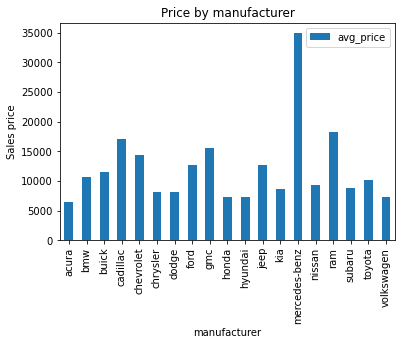

In [23]:
#Visualize the variance in price and miles
#px.scatter(cost_n_price, x=cost_n_price[2], y=cost_n_price[3])
#cost_n_price.plot(x='avg_miles', y='avg_price')


cost_n_price.plot(
    title='Price by manufacturer',
    x='manufacturer',
    y='avg_price',
    
    ylabel='Sales price',
    kind='bar'
)

plt.show()


<div class='alert alert-info'>
    
The mercedes benz has a much higher average price than the other manufactuers in this for-sale list. 
    
Cadillac, GMC, Jeep, Chevrolet, and Ram all have a noticably higher selling price.   

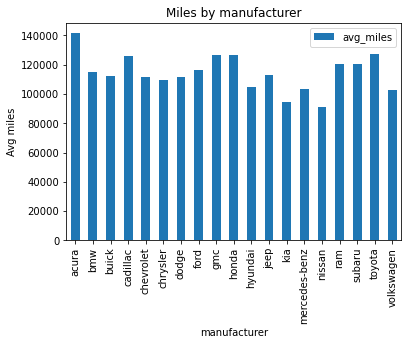

In [24]:
cost_n_price.plot(
    title='Miles by manufacturer',
    x='manufacturer',
    y='avg_miles',
    
    ylabel='Avg miles',
    kind='bar'


)
plt.show()

<div class='alert alert-info'>


It appears that the other manufacturers with lower average miles are more likely to have a higher average sales price.

Maybe the different in car prices are driven by the amount of miles and not the manufacturer. Before running any tests, we will look at a scatter plot of all of them to look for a visual cue.

In [25]:
#see the relationship of price and cars across all items for sale.
#Most cars seem to have less miles and cost under $50k

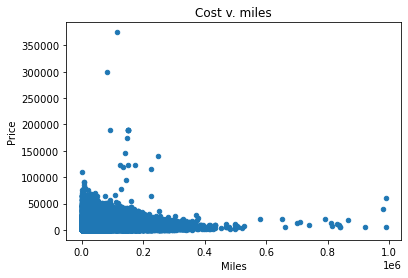

In [26]:
df.plot(title='Cost v. miles', 
        y='price', 
        x='odometer',
        ylabel='Price',
        xlabel='Miles',
        kind='scatter'
       
       )
plt.show()

<div class='alert alert-info'>
There does not appear to be too notable of a correlation between cost and miles. 

In [27]:
print(df['price'].corr(df['odometer']))

-0.42581207176126196


<div class='alert alert-info'>
    
There appears to be a negative correlation between cost and the number of miles. 
      

In [28]:
df_manufacturer_count = df.groupby('manufacturer').count().reset_index()
df_manufacturer_count

,manufacturer,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,acura,236,236,236,236,236,236,235,236,236,236,236,236,236
1,bmw,267,267,267,267,267,267,264,267,267,267,267,267,267
2,buick,271,271,271,271,271,271,266,271,271,271,271,271,271
3,cadillac,322,322,322,322,322,322,317,322,322,322,322,322,322
4,chevrolet,10611,10611,10611,10611,10611,10611,10507,10611,10611,10611,10611,10611,10611
5,chrysler,838,838,838,838,838,838,830,838,838,838,838,838,838
6,dodge,1255,1255,1255,1255,1255,1255,1242,1255,1255,1255,1255,1255,1255
7,ford,12672,12672,12672,12672,12672,12672,12529,12672,12672,12672,12672,12672,12672
8,gmc,2378,2378,2378,2378,2378,2378,2358,2378,2378,2378,2378,2378,2378
9,honda,3485,3485,3485,3485,3485,3485,3452,3485,3485,3485,3485,3485,3485


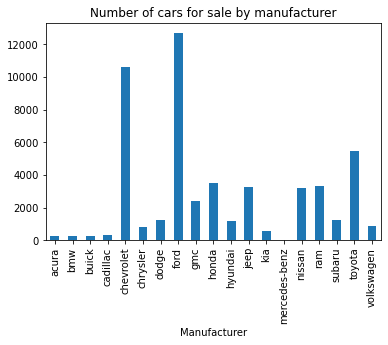

In [29]:
df_manufacturer_count.plot(title='Number of cars for sale by manufacturer',
                           x='manufacturer',
                           y='price',
                           kind='bar',
                           xlabel='Manufacturer',
                           legend=False
                          
                          
                          )

plt.show()

In [30]:
#exploring to see if transmission has an impact on the car costs
df_transmission = df.groupby('transmission')['price'].mean().reset_index(name='avg_price')

df_transmission

,transmission,avg_price
0,automatic,12055.934139
1,manual,9887.836691
2,other,17672.877369


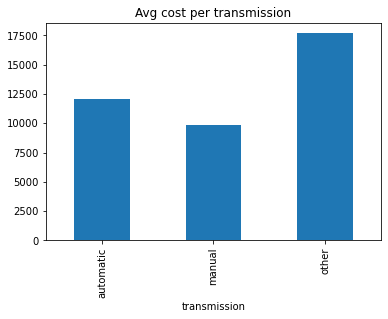

In [31]:
df_transmission.plot(
    title='Avg cost per transmission',
    x='transmission',
    y='avg_price',
    kind='bar',
    legend=False
)
plt.show()

<div class='alert alert-info'>
    
Automatic transmissions apear to cost, on average, significanly more than manual cars. Cars with'other' types of transmissions have a higher average cost than automatic or manual. 


In [32]:
df_tranny = df.groupby('transmission').count().reset_index()
df_tranny

,transmission,price,model_year,model,condition,cylinders,fuel,odometer,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,automatic,46902,46902,46902,46902,46902,46902,46398,46902,46902,46902,46902,46902,46902
1,manual,2829,2829,2829,2829,2829,2829,2803,2829,2829,2829,2829,2829,2829
2,other,1794,1794,1794,1794,1794,1794,1774,1794,1794,1794,1794,1794,1794


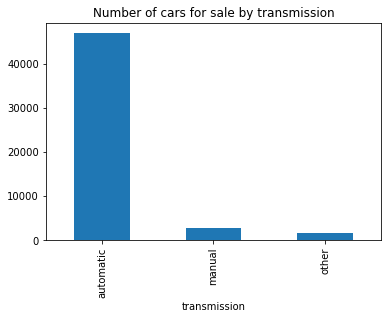

In [33]:
df_tranny.plot(
    title='Number of cars for sale by transmission',
    x='transmission',
    y='price',
    legend=False,
    kind='bar'
)
plt.show()

Because there are so many more automatic cars for sale, the manual and other car types are underrepresented.

In [34]:
df_tranny = df.groupby('transmission')['model_year'].mean().reset_index()
df_tranny

,transmission,model_year
0,automatic,2009.895079
1,manual,2004.974549
2,other,2014.738573


<div class='alert alert-info'>
    
I thought perhaps that the 'other' transmission types could be antique, collectible type of cars, but it appears that they all have a relatively similar `model_year`.
    

## Conclusion
There is a significantly higher amount of Chevys, Fords, and Toyotas for sale than any of the others. Kia, Acura, BMW, Buic, and Cadillac all have much less cars for sale. 

Of all the cars for sale, having less miles on the car is more likely to be correlated with a higher price. 

While the 'other' transmission types have a higher price than the automatic and manual cars, there is a low representation of 'other' transmission types making conclusions difficult to draw. There would be value in learning what the 'other' data types are. 

Similarly, manual cars have a lower cost than automatic but there is a much lower amount of manual cars represented. There could be a lower desire in users to purchase manual cars, making them have a lower average list price.